<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Datos Atípicos </font> </center>

In [1]:
from sklearn.datasets import load_iris

In [2]:
import pandas as pd
import numpy as np

In [3]:
LI = load_iris()
df = pd.DataFrame(LI.data, columns = LI.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


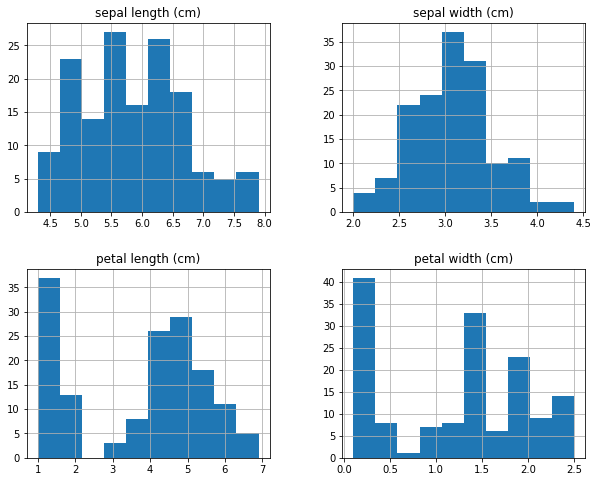

In [5]:
df.hist(figsize=(10,8));

In [6]:
df.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

In [7]:
df.kurt()

sepal length (cm)   -0.552064
sepal width (cm)     0.228249
petal length (cm)   -1.402103
petal width (cm)    -1.340604
dtype: float64

In [4]:
q3,q1 = np.quantile(df, (0.75,0.25), axis=0)
iqr = q3-q1
iqr

array([1.3, 0.5, 3.5, 1.5])

In [8]:
Li = q1 - 1.5*iqr
Ls = q3 + 1.5*iqr

In [9]:
Li, Ls

(array([ 3.15,  2.05, -3.65, -1.95]), array([ 8.35,  4.05, 10.35,  4.05]))

In [10]:
dfcopy = df.copy()

In [11]:
dfcopy.loc[:]= (df<Li) | (df>Ls)

In [12]:
dfcopy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [13]:
for c in dfcopy:
    print(df[dfcopy[c]])

Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
15                5.7               4.4                1.5               0.4
32                5.2               4.1                1.5               0.1
33                5.5               4.2                1.4               0.2
60                5.0               2.0                3.5               1.0
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []
Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []


<AxesSubplot:>

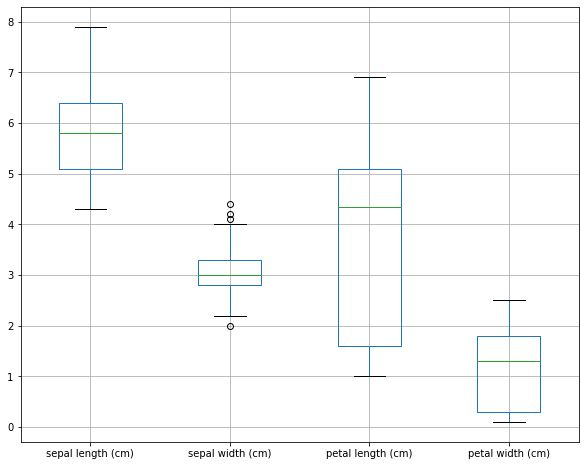

In [16]:
df.boxplot(figsize=(10,8))

## Ejemplo Dataset

#### Detección de outliers univariados

> los outliers tienen una gran relevancia en la detección de anomalías, como la detección de fraudes financieros donde las transacciones fraudulentas tienen comportamientos muy diferentes a los de las transacciones normales.

Existen diversas técnicas para identificar valores atípicos en un conjunto de datos, incluyendo métodos de **inspección visual, métodos estadísticos e incluso modelos de machine learning como el Local Outlier Factor (LOF), el Isolation Forest (IForest) o el algoritmo de K-nearest Neighbors (KNN)**.

Si bien los modelos de machine learning son de gran ayuda en escenarios más complejos como la detección de **outliers multivariados**, para el caso de valores atípicos univariados podemos utilizar los enfoques estadísticos y la inspección visual debido a su simplicidad y eficacia.

Algunos métodos:

> Histograma (Visual).

> Diagrama de caja.

>Z-score y Z-score modificada (estadístico).

>Rango Intercuartílico (IQR).

In [18]:
#dataset "taxis" 
import seaborn as sns
taxis= sns.load_dataset("taxis")
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [20]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [19]:
taxis['total'].describe()

count    6433.000000
mean       18.517794
std        13.815570
min         1.300000
25%        10.800000
50%        14.160000
75%        20.300000
max       174.820000
Name: total, dtype: float64

### Histograma

In [22]:
help(sns.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    disrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate,

Text(0.5, 0, 'Total paid per trip')

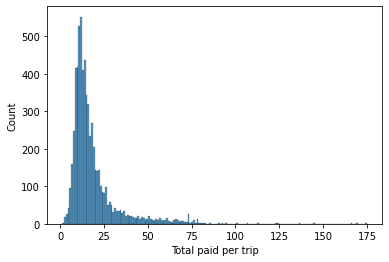

In [21]:
#Usando seaborn
g = sns.histplot(data=taxis, x='total')
g.set_xlabel('Total paid per trip')

<AxesSubplot:>

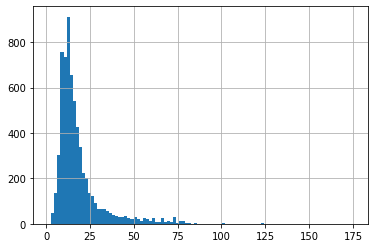

In [23]:
#Usando matplotlib
taxis.total.hist(bins=100)

In [24]:
taxis.total.skew()

3.0933326288688754

In [25]:
taxis.total.kurt()

15.065716540715325

In [ ]:
# los datos se concentran por debajo de los 40$ aproximadamente, mientras que el resto de barras tienen alturas muy bajas
# y se sitúan muy alejadas del resto de datos
# en este caso los outliers se pueden visualizar con bastante claridad, hay ocasiones en las que no son tan evidentes.
# Además, los histogramas no revelan la ubicación exacta de los outliers.

### Diagrama de caja


> **Caja:** Representa el rango intercuartílico (IQR), que indica la distancia entre el primer y el tercer cuartil.

> **Línea mediana:** Divide el conjunto de datos en dos partes iguales.

> **Bigotes:** Son líneas que se extienden desde los extremos de la caja hasta los valores mínimo y máximo dentro de 1.5 veces el IQR del primer y tercer cuartil.

> **Outliers:** Los valores que caen por fuera de los límites son considerados outliers.

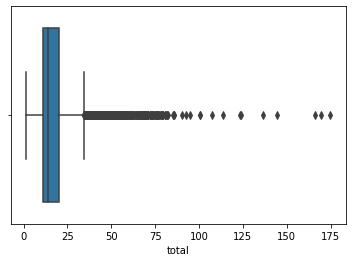

In [26]:
# Box plot
g = sns.boxplot(data=taxis, x='total')
#outliers en la columna ‘total’, pero al igual que con el histograma, es recomendable acompañarlo de técnicas adicionales para determinar
#con exactitud la ubicación de estos valores atípicos.

### Z-score

Un **Z-Score** (puntuación Z), es una medida estadística que indica cuántas desviaciones estándar un punto de datos específico está por encima o por debajo de la media del conjunto de datos.

In [27]:
# Import zscore function
from scipy.stats import zscore

# Calculate z-score for each data point and compute its absolute value
z_scores = zscore(taxis['total'])
abs_z_scores = np.abs(z_scores)

# Select the outliers using a threshold of 3



In [29]:
z_scores

array([-0.40303997, -0.66725518, -0.31545082, ..., -0.08815335,
       -0.8482245 ,  0.11887555])

In [28]:
abs_z_scores

array([0.40303997, 0.66725518, 0.31545082, ..., 0.08815335, 0.8482245 ,
       0.11887555])

In [30]:
outliers = taxis[abs_z_scores>3]
outliers.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
56,2019-03-05 17:57:00,2019-03-05 18:45:25,2,19.59,52.0,0.00,5.76,65.56,yellow,credit card,JFK Airport,Upper East Side North,Queens,Manhattan
162,2019-03-06 17:36:48,2019-03-06 18:43:39,2,17.10,52.0,13.10,5.76,78.66,yellow,credit card,Midtown South,JFK Airport,Manhattan,Queens
188,2019-03-26 15:06:47,2019-03-26 15:59:52,1,18.41,52.0,0.02,5.76,61.08,yellow,credit card,JFK Airport,Midtown Center,Queens,Manhattan
225,2019-03-22 15:36:34,2019-03-22 16:34:48,2,12.07,48.5,11.51,5.76,69.07,yellow,credit card,Manhattan Valley,Boerum Hill,Manhattan,Brooklyn


In [31]:
len(outliers)

185

La elección de 3 como umbral proviene de la regla empírica, según la cual los datos dentro de 3 veces la desviación estándar respecto a la media representan el 99.7% de los datos de la distribución. Sabiendo esto, podemos concluir con bastante seguridad que los datos que caen más allá de este umbral son atípicos, pues son distintos al 99.7% de los datos.

###  Z-Score modificado

Cuando los datos son asimétricos o no se distribuyen de forma normal podemos utilizar el **z-score modificado (MAD-Z Score)**. el z-score modificado mide cuánto se aleja un valor de la mediana en términos de la desviación absoluta mediana.

$$ M_i = \frac{0.6745*(x_i - Mediana)}{MAD}$$

In [33]:
from scipy.stats import median_abs_deviation
# Obtain the MAD value
mad_score= median_abs_deviation(taxis['total'])
mad_score

4.199999999999999

In [34]:
#rambíen podemos calcularlo manualmente:
# Find the median
median = taxis['total'].median()
# Find the absolute value of differences between the median and each data point
abs_diffs = (taxis['total'] - median).abs()
# Take the median of differences
mad_score = abs_diffs.median()

In [35]:
mad_score

4.199999999999999

In [ ]:
#!pip install pyod

In [37]:
# Import MAD estimator
from pyod.models.mad import MAD
# Set threshold to 3.5
mad = MAD(threshold=3.5)

# Convert the 'total' column into a 2D numpy array
total = taxis['total'].values.reshape(-1,1)

# Generate inline and outlier labels
labels=mad.fit(total).labels_

In [38]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
sum(labels)

560

In [41]:
outliers = taxis[labels==1]
outliers

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.00,6.15,0.00,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
22,2019-03-28 17:20:54,2019-03-28 17:55:57,1,9.82,31.50,8.31,5.76,49.87,yellow,credit card,LaGuardia Airport,Sutton Place/Turtle Bay North,Queens,Manhattan
40,2019-03-07 15:15:46,2019-03-07 15:50:14,1,7.51,27.00,6.06,0.00,36.36,yellow,credit card,Flatiron,Carroll Gardens,Manhattan,Brooklyn
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.00,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
53,2019-03-20 18:49:24,2019-03-20 19:12:40,1,13.45,36.00,0.00,0.00,37.80,yellow,cash,JFK Airport,Sunnyside,Queens,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,2019-03-15 17:44:09,2019-03-15 18:20:25,1,11.44,41.63,0.00,0.00,42.13,green,credit card,Bushwick South,LaGuardia Airport,Brooklyn,Queens
6398,2019-03-17 13:07:29,2019-03-17 13:51:56,1,18.39,50.50,7.70,0.00,59.00,green,credit card,DUMBO/Vinegar Hill,JFK Airport,Brooklyn,Queens
6400,2019-03-22 17:41:23,2019-03-22 18:26:00,1,13.77,43.50,4.00,0.00,52.05,green,credit card,Jamaica,Little Italy/NoLiTa,Queens,Manhattan
6417,2019-03-10 12:10:45,2019-03-10 12:43:05,2,11.17,35.00,0.00,5.76,41.56,green,credit card,Hillcrest/Pomonok,Flatiron,Queens,Manhattan


### IQR


> Límite inferior = $Q1 — (k * IQR)$

> Límite superior = $Q3 + (k * IQR)$

Donde $Q1$ es el primer cuartil y $Q3$ es el tercer cuartil. El valor más común del factor $k$ es 1.5
Los valores que se encuentren por debajo del límite inferior o por encima del límite superior se consideran atípicos.

In [42]:
# Calculate the percentiles
q1 = taxis['total'].quantile(0.25)
q3 = taxis['total'].quantile(0.75)
# Obtain IQR
iqr = q3-q1
# Upper and lower thresholds
Lu = q3 + 1.5*iqr
Ll = q1 - 1.5*iqr
# Subset the dataset 
outliers = taxis[(taxis['total']<Ll) | (taxis['total']>Lu)]
outliers

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.00,6.15,0.00,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
22,2019-03-28 17:20:54,2019-03-28 17:55:57,1,9.82,31.50,8.31,5.76,49.87,yellow,credit card,LaGuardia Airport,Sutton Place/Turtle Bay North,Queens,Manhattan
40,2019-03-07 15:15:46,2019-03-07 15:50:14,1,7.51,27.00,6.06,0.00,36.36,yellow,credit card,Flatiron,Carroll Gardens,Manhattan,Brooklyn
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.00,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
43,2019-03-27 19:39:16,2019-03-27 20:00:26,1,9.50,28.00,0.00,5.76,35.06,yellow,cash,LaGuardia Airport,Washington Heights South,Queens,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,2019-03-15 17:44:09,2019-03-15 18:20:25,1,11.44,41.63,0.00,0.00,42.13,green,credit card,Bushwick South,LaGuardia Airport,Brooklyn,Queens
6398,2019-03-17 13:07:29,2019-03-17 13:51:56,1,18.39,50.50,7.70,0.00,59.00,green,credit card,DUMBO/Vinegar Hill,JFK Airport,Brooklyn,Queens
6400,2019-03-22 17:41:23,2019-03-22 18:26:00,1,13.77,43.50,4.00,0.00,52.05,green,credit card,Jamaica,Little Italy/NoLiTa,Queens,Manhattan
6417,2019-03-10 12:10:45,2019-03-10 12:43:05,2,11.17,35.00,0.00,5.76,41.56,green,credit card,Hillcrest/Pomonok,Flatiron,Queens,Manhattan


## ¿Qué hacer después de identificar los outliers?

> **Mantenerlos:** Podemos mantener los outliers si consideramos que pueden ser representativos de un subconjunto de nuestros datos.

> **Eliminarlos:** Si estamos seguros de que los outliers provienen de un error en la entrada de los datos, como un error humano o de medida, y no podemos solucionarlo, podemos eliminarlos del conjunto de datos.

> **Imputar:** La imputación implica reemplazar los valores atípicos con otros valores como la mediana o la media. Esto se suele hacer cuando queremos conservar la mayor cantidad de datos, pero eliminando el efecto de los outliers.


In [43]:
# Mantenerlos, eliminarlos
taxis_filtrado = taxis[labels==0]
taxis_filtrado

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.0,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,2019-03-23 18:26:09,2019-03-23 18:49:12,1,7.07,20.0,0.00,0.0,20.00,green,cash,Parkchester,East Harlem South,Bronx,Manhattan
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [44]:
# imputar:
# Calculate the median
median_value = taxis['total'].median()

# Impute outliers with the median
taxis_imp = taxis.copy()

In [46]:
median_value

14.16

In [45]:
taxis_imp

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


### Ejercicio DS_Salaries.csv

In [47]:
ds_df = pd.read_csv('Data/ds_salaries.csv')

In [48]:
ds_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [49]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


array([[<AxesSubplot:title={'center':'work_year'}>,
        <AxesSubplot:title={'center':'salary'}>],
       [<AxesSubplot:title={'center':'salary_in_usd'}>,
        <AxesSubplot:title={'center':'remote_ratio'}>]], dtype=object)

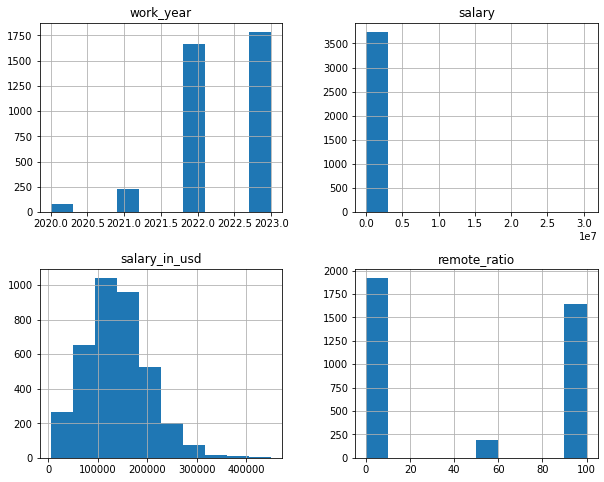

In [51]:
ds_df.hist(figsize=(10,8))

<AxesSubplot:>

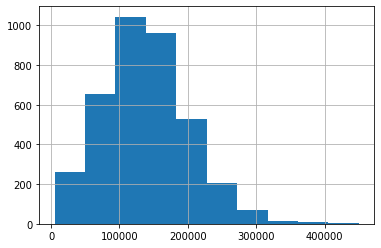

In [52]:
ds_df['salary_in_usd'].hist()

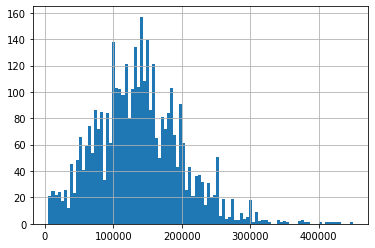

In [53]:
x = ds_df.salary_in_usd
h = x.hist(bins=100)

In [ ]:
#zscore mod
#iqr para eliminar o imputar los valores atípicos

## Datos atípicos en un modelo lineal

In [56]:
from matplotlib import pyplot as plt

In [57]:
N=20
x = np.linspace(0,10,N)
y = 10 + 2*x + np.random.normal(loc=0, scale=2, size=(N,))
y[0] = 30
y[-1] = 10

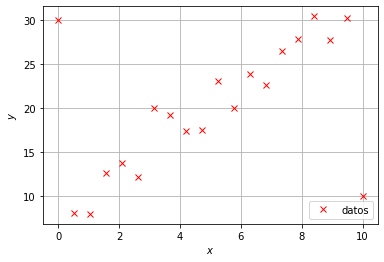

In [58]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr', label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

In [59]:
# Obteniendo una relación líneal entre las dos variables
from sklearn.linear_model import LinearRegression

In [60]:
lin = LinearRegression()

In [61]:
lin.fit(x.reshape(-1,1), y.reshape(-1,1))

LinearRegression()

In [62]:
lin.coef_, lin.intercept_

(array([[1.2311206]]), array([13.89689789]))

In [67]:
beta = [lin.intercept_[0], lin.coef_[0][0]]

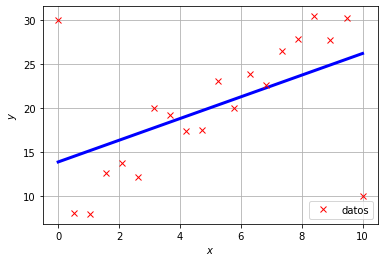

In [68]:
# Graficar
plt.figure(figsize=(6,4))
y_fit = beta[0] + beta[1]*x
plt.plot(x,y_fit, 'b', lw=3)
plt.plot(x,y,'xr', label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()